In [1]:
import numpy as np
import pandas as pd
from pandas import Series
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('D:/projects/min temp time-series/temp.csv',header=0,squeeze=True)

In [3]:
data.head()

,Date,"Daily minimum temperatures in Melbourne, Australia, 1981-1990"
0,01-01-1981,20.7
1,02-01-1981,17.9
2,03-01-1981,18.8
3,04-01-1981,14.6
4,05-01-1981,15.8


In [4]:
data['Date'] = pd.to_datetime(data['Date'],format='%d-%m-%Y')

In [5]:
data = data.rename(columns = {'Daily minimum temperatures in Melbourne, Australia, 1981-1990': 'Temperature'})

In [6]:
data['Temperature'] = data['Temperature'].astype("float64")

In [7]:
import seaborn as sns

In [8]:
avg_temp = data.Temperature.mean()

In [9]:
data1 = data.copy()

In [10]:
data1['avg_temp'] = avg_temp

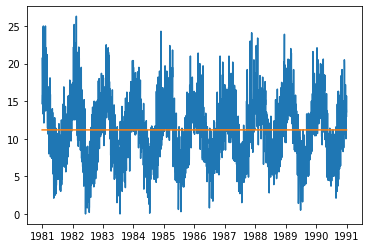

In [11]:
plt.plot(data['Date'],data['Temperature'])
plt.plot(data['Date'],data1['avg_temp'])

In [12]:
series = pd.read_csv('D:/projects/min temp time-series/temp.csv',header=0,squeeze=True,index_col=0,parse_dates=True)

In [13]:
series.head()

Date
1981-01-01    20.7
1981-02-01    17.9
1981-03-01    18.8
1981-04-01    14.6
1981-05-01    15.8
Name: Daily minimum temperatures in Melbourne, Australia, 1981-1990, dtype: float64

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

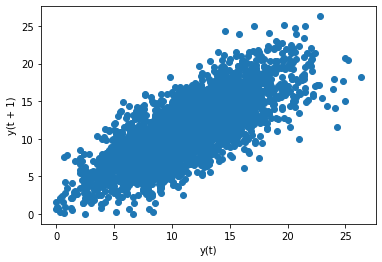

In [14]:
pd.plotting.lag_plot(series)

In [15]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error

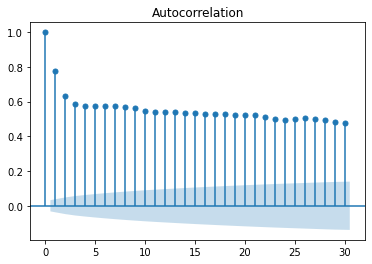

In [16]:
plot_acf(series,lags=30)
plt.show()

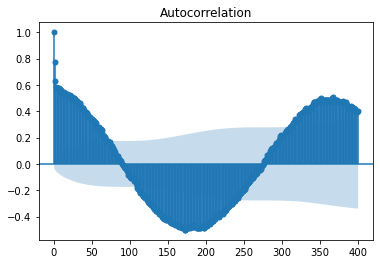

In [59]:
plot_acf(series,lags=400)
plt.show()

In [17]:
values = series.values

In [18]:
train,test = values[0:len(values)-7],values[len(values)-7:]

In [19]:
train

array([20.7, 17.9, 18.8, ..., 13.2, 13.9, 10. ])

In [20]:
len(values)

3650

In [21]:
error = []
lags = []
for k in range(1,31):
    model1 = AutoReg(train,lags=k)
    model1_fit=model1.fit()
    pred = model1_fit.predict(start = len(train), end = len(train)+len(test)-1,dynamic=False)
    rmse = np.sqrt(mean_squared_error(test,pred))
    print("for lags = %f, Root Mean Squared Error: %0.3f"%(k,rmse))
    error.append(rmse)
    lags.append(k)


   




C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use t

for lags = 1.000000, Root Mean Squared Error: 3.334
for lags = 2.000000, Root Mean Squared Error: 3.240
for lags = 3.000000, Root Mean Squared Error: 2.977
for lags = 4.000000, Root Mean Squared Error: 2.763
for lags = 5.000000, Root Mean Squared Error: 2.468
for lags = 6.000000, Root Mean Squared Error: 2.227
for lags = 7.000000, Root Mean Squared Error: 1.868
for lags = 8.000000, Root Mean Squared Error: 1.726
for lags = 9.000000, Root Mean Squared Error: 1.620
for lags = 10.000000, Root Mean Squared Error: 1.564
for lags = 11.000000, Root Mean Squared Error: 1.531
for lags = 12.000000, Root Mean Squared Error: 1.530
for lags = 13.000000, Root Mean Squared Error: 1.545
for lags = 14.000000, Root Mean Squared Error: 1.575
for lags = 15.000000, Root Mean Squared Error: 1.640
for lags = 16.000000, Root Mean Squared Error: 1.651
for lags = 17.000000, Root Mean Squared Error: 1.627
for lags = 18.000000, Root Mean Squared Error: 1.526
for lags = 19.000000, Root Mean Squared Error: 1.485


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use t

for lags = 20.000000, Root Mean Squared Error: 1.328
for lags = 21.000000, Root Mean Squared Error: 1.237
for lags = 22.000000, Root Mean Squared Error: 1.203
for lags = 23.000000, Root Mean Squared Error: 1.230
for lags = 24.000000, Root Mean Squared Error: 1.205
for lags = 25.000000, Root Mean Squared Error: 1.194
for lags = 26.000000, Root Mean Squared Error: 1.208
for lags = 27.000000, Root Mean Squared Error: 1.214
for lags = 28.000000, Root Mean Squared Error: 1.227
for lags = 29.000000, Root Mean Squared Error: 1.225
for lags = 30.000000, Root Mean Squared Error: 1.225


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


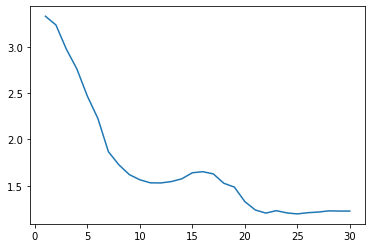

In [22]:
plt.plot(lags,error)

In [23]:
model2 = AutoReg(train,lags=14)
model2_fit=model2.fit()
pred1 = model2_fit.predict(start = len(train), end = len(train)+len(test)-1,dynamic=False)
rmse = np.sqrt(mean_squared_error(test,pred1))
print("for lags = %f, Root Mean Squared Error: %0.3f"%(14,rmse))
for i in range (len(pred1)):
    print('Predicted temperature =%f, Expected Temperature=%f' %(pred1[i],test[i]))

for lags = 14.000000, Root Mean Squared Error: 1.575
Predicted temperature =11.333390, Expected Temperature=12.900000
Predicted temperature =12.469958, Expected Temperature=14.600000
Predicted temperature =12.879503, Expected Temperature=14.000000
Predicted temperature =12.857908, Expected Temperature=13.600000
Predicted temperature =12.842412, Expected Temperature=13.500000
Predicted temperature =12.854446, Expected Temperature=15.700000
Predicted temperature =12.829843, Expected Temperature=13.000000


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


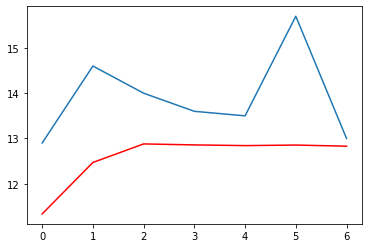

In [24]:
plt.plot(test)
plt.plot(pred1,color='red')
plt.show()

In [25]:
model3 = AutoReg(train,lags=29)
model3_fit=model3.fit()
pred2 = model3_fit.predict(start = len(train), end = len(train)+len(test)-1,dynamic=False)
rmse = np.sqrt(mean_squared_error(test,pred2))
print("for lags = %f, Root Mean Squared Error: %0.3f"%(29,rmse))
for i in range (len(pred2)):
    print('Predicted temperature =%f, Expected Temperature=%f' %(pred2[i],test[i]))

for lags = 29.000000, Root Mean Squared Error: 1.225
Predicted temperature =11.872160, Expected Temperature=12.900000
Predicted temperature =13.055704, Expected Temperature=14.600000
Predicted temperature =13.531810, Expected Temperature=14.000000
Predicted temperature =13.242590, Expected Temperature=13.600000
Predicted temperature =13.091564, Expected Temperature=13.500000
Predicted temperature =13.146082, Expected Temperature=15.700000
Predicted temperature =13.176492, Expected Temperature=13.000000


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


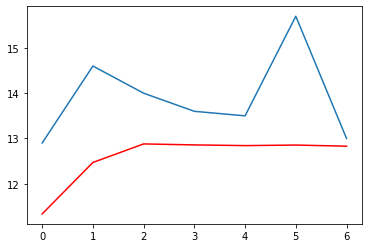

In [26]:
plt.plot(test)
plt.plot(pred1,color='red')
plt.show()

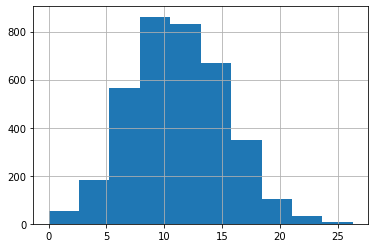

In [27]:
series.hist()
plt.show()

In [28]:
split=round(len(values)/2)

In [29]:
split

1825

In [30]:
x1,x2 = values[0:split],values[split:]

In [32]:
x1.shape,x2.shape

((1825,), (1825,))

In [33]:
x2

array([12.9, 13.8, 10.6, ..., 13.5, 15.7, 13. ])

In [34]:
x1_mean, x2_mean = x1.mean(),x2.mean()
x1_var,x2_var = x1.var(),x2.var()
print(x1_mean,x2_mean)
print(x1_var,x2_var)

11.043506849315069 11.312000000000001
18.160824962281854 14.953757369863014


In [35]:
from statsmodels.tsa.stattools import adfuller

In [52]:
stat = adfuller(values)
stat

(-4.444804924611689,
 0.0002470826300361109,
 20,
 3629,
 {'1%': -3.4321532327220154,
  '5%': -2.862336767636517,
  '10%': -2.56719413172842},
 16642.822304301197)

In [56]:
print("ADF Statistics = %f" %stat[0])
print(" P-Value of Augumented Dickey-Fuller Test=%f" %stat[1])
print("Critical Values")
for key,value in stat[4].items():
    print('{} = {}'.format(key, value))

ADF Statistics = -4.444805
 P-Value of Augumented Dickey-Fuller Test=0.000247
Critical Values
1% = -3.4321532327220154
5% = -2.862336767636517
10% = -2.56719413172842


In [57]:
if(stat[1]<0.05):
    print("OUR TIME SERIES IS STATIONARY")

OUR TIME SERIES IS STATIONARY
